In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_path = Path("result/20240307_steady_temperature")

csv_files = list(base_path.glob("*/s2/result.csv"))
sorted_csv_files = sorted(
    csv_files, key=lambda x: x.parent.parent.name.split("_")[:2]
)

In [3]:
# 마지막 600개의 데이터를 저장할 빈 리스트 생성
data_list = []

# 각 파일에서 마지막 600개의 데이터 읽어오기
for file_path in sorted_csv_files:
    df = pd.read_csv(file_path)
    last_600_rows = df.iloc[-600:-100]
    data_list.append(last_600_rows)

# 모든 데이터를 하나의 데이터프레임으로 합치기
df2 = pd.concat(data_list, ignore_index=True)

In [4]:
df2.head()

,Timestamp,Ambient Temperature,Power,CPU Temperature,TPU Temperature
0,2024-03-11 15:56:13.700,23.6,3.165126,56.0,54.55
1,2024-03-11 15:56:13.800,23.6,3.159628,56.0,54.55
2,2024-03-11 15:56:13.900,23.6,3.159872,56.0,54.55
3,2024-03-11 15:56:14.000,23.6,3.154302,56.0,54.55
4,2024-03-11 15:56:14.100,23.6,3.225365,56.0,54.55


In [5]:
df2.tail()

,Timestamp,Ambient Temperature,Power,CPU Temperature,TPU Temperature
14995,2024-03-12 18:45:33.600,20.8,3.475333,55.0,53.30
14996,2024-03-12 18:45:33.700,20.8,3.132315,55.0,53.30
14997,2024-03-12 18:45:33.800,20.8,3.140431,55.0,53.55
14998,2024-03-12 18:45:33.900,20.8,3.137026,55.0,53.55
14999,2024-03-12 18:45:34.000,20.8,3.138574,55.0,53.30


In [6]:
df2["TPU Temperature"].mean(), df2["TPU Temperature"].std()

(54.26659999999998, 0.664164021601471)

In [33]:
df2["R"] = (df2["TPU Temperature"] - df2["Ambient Temperature"]) / df2["Power"]

R_avg = df2["R"].mean()
R_std = df2['R'].std()

print(f"The average thermal resistance (R) is: {R_avg:.2f} °C/W")
print(f"The standard deviation of thermal resistance (R) is: {R_std:.2f} °C/W")

The average thermal resistance (R) is: 10.00 °C/W
The standard deviation of thermal resistance (R) is: 0.31 °C/W


In [34]:
df2

,Timestamp,Ambient Temperature,Power,CPU Temperature,TPU Temperature,R
0,2024-03-11 15:56:13.700,23.6,3.165126,56.0,54.55,9.778442
1,2024-03-11 15:56:13.800,23.6,3.159628,56.0,54.55,9.795458
2,2024-03-11 15:56:13.900,23.6,3.159872,56.0,54.55,9.794702
3,2024-03-11 15:56:14.000,23.6,3.154302,56.0,54.55,9.811996
4,2024-03-11 15:56:14.100,23.6,3.225365,56.0,54.55,9.595813
...,...,...,...,...,...,...
14995,2024-03-12 18:45:33.600,20.8,3.475333,55.0,53.30,9.351623
14996,2024-03-12 18:45:33.700,20.8,3.132315,55.0,53.30,10.375713
14997,2024-03-12 18:45:33.800,20.8,3.140431,55.0,53.55,10.428505
14998,2024-03-12 18:45:33.900,20.8,3.137026,55.0,53.55,10.439823


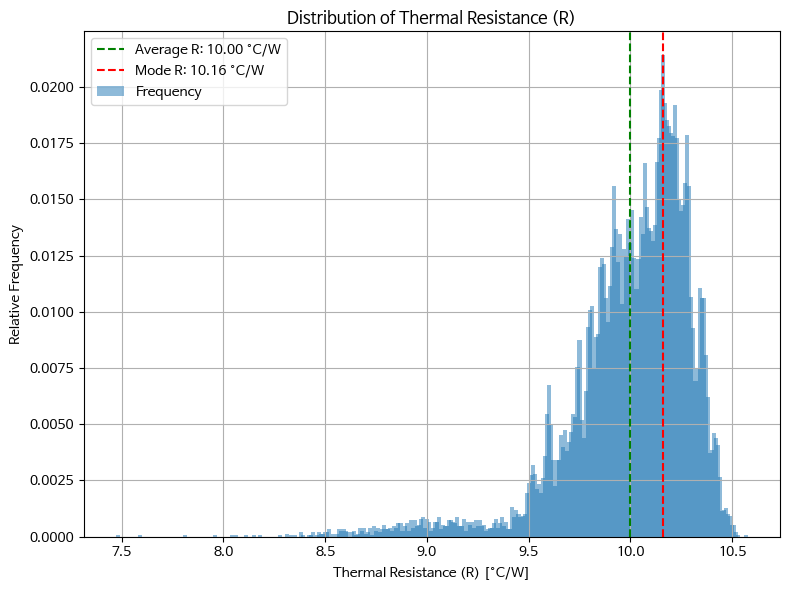

In [37]:
# 'R' 값을 반올림하여 빈도 계산
df2['R_rounded'] = df2['R'].round(2)
R_freq = df2['R_rounded'].value_counts().sort_index()
R_mode = R_freq.idxmax()

# 분포 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(R_freq.index, R_freq / len(df2), width=0.02, alpha=0.5, label='Frequency')
plt.axvline(x=R_avg, color='g', linestyle='--', label=f'Average R: {R_avg:.2f} °C/W')
plt.axvline(x=R_mode, color='r', linestyle='--', label=f'Mode R: {R_mode:.2f} °C/W')
plt.xlabel('Thermal Resistance (R) [°C/W]')
plt.ylabel('Relative Frequency')
plt.title('Distribution of Thermal Resistance (R)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()